## Saving real data for matlab 

In [ ]:
cd U-SPDNet

In [ ]:
import os
import shutil
import random

# Function to create subdirectories and distribute files
def distribute_files(src_folder, dst_folder, distribution_ratio):
    files = os.listdir(src_folder)
    random.shuffle(files)  # Shuffle to randomly select files

    # Calculate split index
    split_index = int(len(files) * distribution_ratio)

    # Distribute files
    for file in files[:split_index]:
        shutil.copy(os.path.join(src_folder, file), os.path.join(dst_folder, 'train', src_folder))
    for file in files[split_index:]:
        shutil.copy(os.path.join(src_folder, file), os.path.join(dst_folder, 'val', src_folder))

# Main directory and subdirectories
main_dir = 'UAV_CONV'
sub_dirs = ['1', '2', '3']

# Create main directory and subdirectories
os.makedirs(main_dir, exist_ok=True)
os.makedirs(os.path.join(main_dir, 'train'), exist_ok=True)
os.makedirs(os.path.join(main_dir, 'val'), exist_ok=True)

# Create subdirectories inside 'train' and 'val'
for sub_dir in sub_dirs:
    os.makedirs(os.path.join(main_dir, 'train', sub_dir), exist_ok=True)
    os.makedirs(os.path.join(main_dir, 'val', sub_dir), exist_ok=True)

# Distribution ratio
ratio = 0.75  # 75% for training

# Process each folder
for folder in sub_dirs:
    distribute_files(folder, main_dir, ratio)

print("Data distribution complete.")


In [ ]:
import numpy as np
import scipy.io as sio
import os

def convert_npy_to_mat(source_directory, destination_directory):
    """
    Convert all .npy files in the source directory to .mat files and save them in the destination directory.

    Parameters:
    source_directory (str): The path to the directory containing .npy files.
    destination_directory (str): The path to the directory where .mat files will be saved.
    """
    # Ensure the destination directory exists
    if not os.path.exists(destination_directory):
        os.makedirs(destination_directory)

    # Iterate over all files in the source directory
    for file in os.listdir(source_directory):
        # Check for .npy extension
        if file.endswith('.npy'):
            # Load the .npy file
            data = np.load(os.path.join(source_directory, file))

            # Define the .mat file name
            mat_file_name = file.replace('.npy', '.mat')

            # Define the full path for the .mat file
            mat_file_path = os.path.join(destination_directory, mat_file_name)

            # Save the .mat file
            sio.savemat(mat_file_path, {'data': data})
    
    print(f'Conversion from .npy to .mat completed for {source_directory}.')

# Example usage:
convert_npy_to_mat('/Users/alexa/Documents/MATLAB/U-SPDNet/data/afew/UAV_CONV/val/3', '/Users/alexa/Documents/MATLAB/U-SPDNet/data/afew/UAV_CONV_mat/val/3')
convert_npy_to_mat('/Users/alexa/Documents/MATLAB/U-SPDNet/data/afew/UAV_CONV/val/1', '/Users/alexa/Documents/MATLAB/U-SPDNet/data/afew/UAV_CONV_mat/val/1')
convert_npy_to_mat('/Users/alexa/Documents/MATLAB/U-SPDNet/data/afew/UAV_CONV/val/2', '/Users/alexa/Documents/MATLAB/U-SPDNet/data/afew/UAV_CONV_mat/val/2')

convert_npy_to_mat('/Users/alexa/Documents/MATLAB/U-SPDNet/data/afew/UAV_CONV/train/3', '/Users/alexa/Documents/MATLAB/U-SPDNet/data/afew/UAV_CONV_mat/train/3')
convert_npy_to_mat('/Users/alexa/Documents/MATLAB/U-SPDNet/data/afew/UAV_CONV/train/1', '/Users/alexa/Documents/MATLAB/U-SPDNet/data/afew/UAV_CONV_mat/train/1')
convert_npy_to_mat('/Users/alexa/Documents/MATLAB/U-SPDNet/data/afew/UAV_CONV/train/2', '/Users/alexa/Documents/MATLAB/U-SPDNet/data/afew/UAV_CONV_mat/train/2')



In [ ]:
import os
import numpy as np
from scipy.io import savemat

# Paths to the UAV_CONV dataset
dataset_path = '/Users/alexa/Documents/MATLAB/U-SPDNet/data/afew/UAV_CONV'
train_path = os.path.join(dataset_path, 'train')
val_path = os.path.join(dataset_path, 'val')

# Initialize lists to hold the data
names = []
ids = []
sets = []
labels = []

# Function to process each folder and collect data
def process_folder(path, set_value, label_value):
    for file in os.listdir(path):
        file_path = os.path.join(path, file)
        if os.path.isfile(file_path):
            # Assuming file names are unique identifiers for 'id'
            matrix_id = int(file.split('_')[1].split('.')[0])
#             matrix_name = f"./UAV_CONV/{set_name}/{label_value}/{file}"
            names.append(f'{file_path}')
            ids.append(matrix_id)
            sets.append(set_value)
            labels.append(label_value)

# Process each class folder for train and val
for label in ('1', '2', '3'):
    process_folder(os.path.join(train_path, label), 1, int(label))  # Train set is indicated by 1
    process_folder(os.path.join(val_path, label), 2, int(label))   # Val set is indicated by 2

# Convert lists to numpy arrays with the correct type and shape
names = np.array(names, dtype=object)  # For strings, use object type to ensure MATLAB cell array
ids = np.array(ids, dtype=np.float64).reshape(1, -1)  # Shape as a row vector
sets = np.array(sets, dtype=np.float64).reshape(1, -1)  # Shape as a row vector
labels = np.array(labels, dtype=np.float64).reshape(1, -1)  # Shape as a row vector

# Create the structure with the correct MATLAB equivalent types
spd_structure = {
    'spd': {
        'name': names,
        'id': ids,
        'set': sets,
        'label': labels
    },
    'SpdDir': np.array(['./data/afew/UAV_COV'], dtype=object)
}

# Save to a .mat file ensuring the variables are saved as doubles and with compression
matfile_path = './data/afew/sample_for_SPDNet_UAV.mat'
savemat(matfile_path, {'spd_train': spd_structure}, do_compression=True)

matfile_path



In [91]:
import scipy.io
import matplotlib.pyplot as plt

# Load the matrices
data_ori = scipy.io.loadmat('/Users/alexa/Documents/MATLAB/U-SPDNet/data/afew/data_ori_epoch_70.mat')['data_ori']
data_latent = scipy.io.loadmat('/Users/alexa/Documents/MATLAB/U-SPDNet/data/afew/data_latent_epoch_70.mat')['data_latent']
data_recov = scipy.io.loadmat('/Users/alexa/Documents/MATLAB/U-SPDNet/data/afew/data_recov_epoch_70.mat')['data_recov']



In [92]:
data_ori

array([[1.        , 0.178251  , 0.15891962, ..., 0.14689847, 0.14689847,
        0.14689847],
       [0.178251  , 1.        , 0.27992025, ..., 0.1646415 , 0.1646415 ,
        0.1646415 ],
       [0.15891962, 0.27992025, 1.        , ..., 0.22426458, 0.22426458,
        0.22426458],
       ...,
       [0.14689847, 0.1646415 , 0.22426458, ..., 1.11538845, 1.11538845,
        1.11538845],
       [0.14689847, 0.1646415 , 0.22426458, ..., 1.11538845, 1.11538845,
        1.11538845],
       [0.14689847, 0.1646415 , 0.22426458, ..., 1.11538845, 1.11538845,
        1.11538845]])

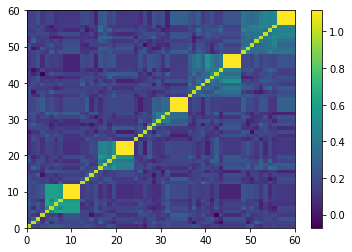

In [93]:
# Plotting correlation matrix
plt.pcolormesh(data_ori)
plt.colorbar()
plt.savefig('uspdnetinput70.png')
plt.show()

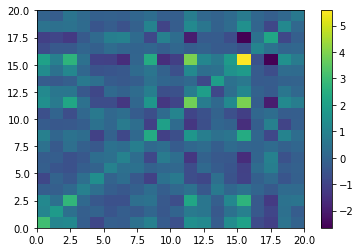

In [89]:
# Plotting correlation matrix
plt.pcolormesh(data_latent[1][0])
plt.colorbar()
plt.savefig('uspdnetlatent100.png')
plt.show()

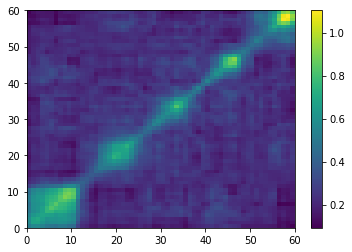

In [90]:
# Plotting correlation matrix
plt.pcolormesh(data_recov[1][0])
plt.colorbar()
plt.savefig('uspdnetreconstructed100.png')
plt.show()

In [1]:
import scipy.io
import matplotlib.pyplot as plt

# Load the matrices
data_ori = scipy.io.loadmat('/Users/alexa/Documents/MATLAB/U-SPDNet/data/afew/data_ori_epoch_10.mat')['data_ori']
data_latent = scipy.io.loadmat('/Users/alexa/Documents/MATLAB/U-SPDNet/data/afew/data_latent_epoch_10.mat')['data_latent']
data_recov = scipy.io.loadmat('/Users/alexa/Documents/MATLAB/U-SPDNet/data/afew/data_recov_epoch_10.mat')['data_recov']



In [94]:
import matplotlib.pyplot as plt
import numpy as np

# Get the 'viridis' colormap
viridis = plt.get_cmap('viridis')

# Get the RGB values for 256 colors
viridis_colors = viridis(np.linspace(0, 1, 256))

# Convert RGB values to a format that can be easily copied to MATLAB
viridis_rgb = [list(color[:3]) for color in viridis_colors]  # Ignore the alpha channel

# Print the RGB values in MATLAB format
for color in viridis_rgb:
    print(f"{color[0]}, {color[1]}, {color[2]}")


0.267004, 0.004874, 0.329415
0.26851, 0.009605, 0.335427
0.269944, 0.014625, 0.341379
0.271305, 0.019942, 0.347269
0.272594, 0.025563, 0.353093
0.273809, 0.031497, 0.358853
0.274952, 0.037752, 0.364543
0.276022, 0.044167, 0.370164
0.277018, 0.050344, 0.375715
0.277941, 0.056324, 0.381191
0.278791, 0.062145, 0.386592
0.279566, 0.067836, 0.391917
0.280267, 0.073417, 0.397163
0.280894, 0.078907, 0.402329
0.281446, 0.08432, 0.407414
0.281924, 0.089666, 0.412415
0.282327, 0.094955, 0.417331
0.282656, 0.100196, 0.42216
0.28291, 0.105393, 0.426902
0.283091, 0.110553, 0.431554
0.283197, 0.11568, 0.436115
0.283229, 0.120777, 0.440584
0.283187, 0.125848, 0.44496
0.283072, 0.130895, 0.449241
0.282884, 0.13592, 0.453427
0.282623, 0.140926, 0.457517
0.28229, 0.145912, 0.46151
0.281887, 0.150881, 0.465405
0.281412, 0.155834, 0.469201
0.280868, 0.160771, 0.472899
0.280255, 0.165693, 0.476498
0.279574, 0.170599, 0.479997
0.278826, 0.17549, 0.483397
0.278012, 0.180367, 0.486697
0.277134, 0.185228, 0.48